## Question 4 - Group 11

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mlt 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HRDataset_v14.csv')

In [3]:
df1 = df[['Department','Termd']]

In [4]:
df2 = df1.groupby(['Department'])['Termd'].value_counts().reset_index(name='count')
df2 = df2.groupby(['Department', 'Termd'])['count'].aggregate('first').unstack()
df2.to_csv('ques4depart.csv')
df2=pd.read_csv('ques4depart.csv')
df2

,Department,0,1
0,Admin Offices,7.0,2.0
1,Executive Office,1.0,NaN
2,IT/IS,40.0,10.0
3,Production,126.0,83.0
4,Sales,26.0,5.0
5,Software Engineering,7.0,4.0


In [5]:
dfp = df[df['Department']=='Production       ']
dfp

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7
305,"Wolk, Hang T",10174,0,0,0,1,5,3,0,60446,...,David Stanley,14.0,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0,14
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4


In [6]:
dfp3 = dfp[['TermReason','EmploymentStatus']]
dfp3

,TermReason,EmploymentStatus
0,N/A-StillEmployed,Active
2,hours,Voluntarily Terminated
3,N/A-StillEmployed,Active
4,return to school,Voluntarily Terminated
5,N/A-StillEmployed,Active
...,...,...
304,retiring,Voluntarily Terminated
305,N/A-StillEmployed,Active
306,N/A-StillEmployed,Active
307,Another position,Voluntarily Terminated


In [7]:
dfp4=dfp3[dfp3['EmploymentStatus']!='Active']
dfp4

,TermReason,EmploymentStatus
2,hours,Voluntarily Terminated
4,return to school,Voluntarily Terminated
10,Another position,Voluntarily Terminated
11,unhappy,Voluntarily Terminated
14,Another position,Voluntarily Terminated
...,...,...
301,unhappy,Voluntarily Terminated
302,Another position,Voluntarily Terminated
303,relocation out of area,Voluntarily Terminated
304,retiring,Voluntarily Terminated


In [8]:
dfp5 = dfp4.groupby(['EmploymentStatus'])['TermReason'].value_counts().reset_index(name='count')
dfp5 = dfp5.groupby(['TermReason','EmploymentStatus'])['count'].aggregate('first').unstack()
dfp5

EmploymentStatus,Terminated for Cause,Voluntarily Terminated
TermReason,,
Another position,NaN,17.0
attendance,4.0,1.0
career change,NaN,6.0
gross misconduct,1.0,NaN
hours,NaN,6.0
maternity leave - did not return,NaN,2.0
medical issues,NaN,1.0
military,NaN,4.0
more money,NaN,11.0


In [9]:
dfp5.to_csv('ques4prod.csv')
dfp5=pd.read_csv('ques4prod.csv')
dfp5=dfp5.fillna(0)
dfp5

,TermReason,Terminated for Cause,Voluntarily Terminated
0,Another position,0.0,17.0
1,attendance,4.0,1.0
2,career change,0.0,6.0
3,gross misconduct,1.0,0.0
4,hours,0.0,6.0
5,maternity leave - did not return,0.0,2.0
6,medical issues,0.0,1.0
7,military,0.0,4.0
8,more money,0.0,11.0
9,"no-call, no-show",1.0,0.0


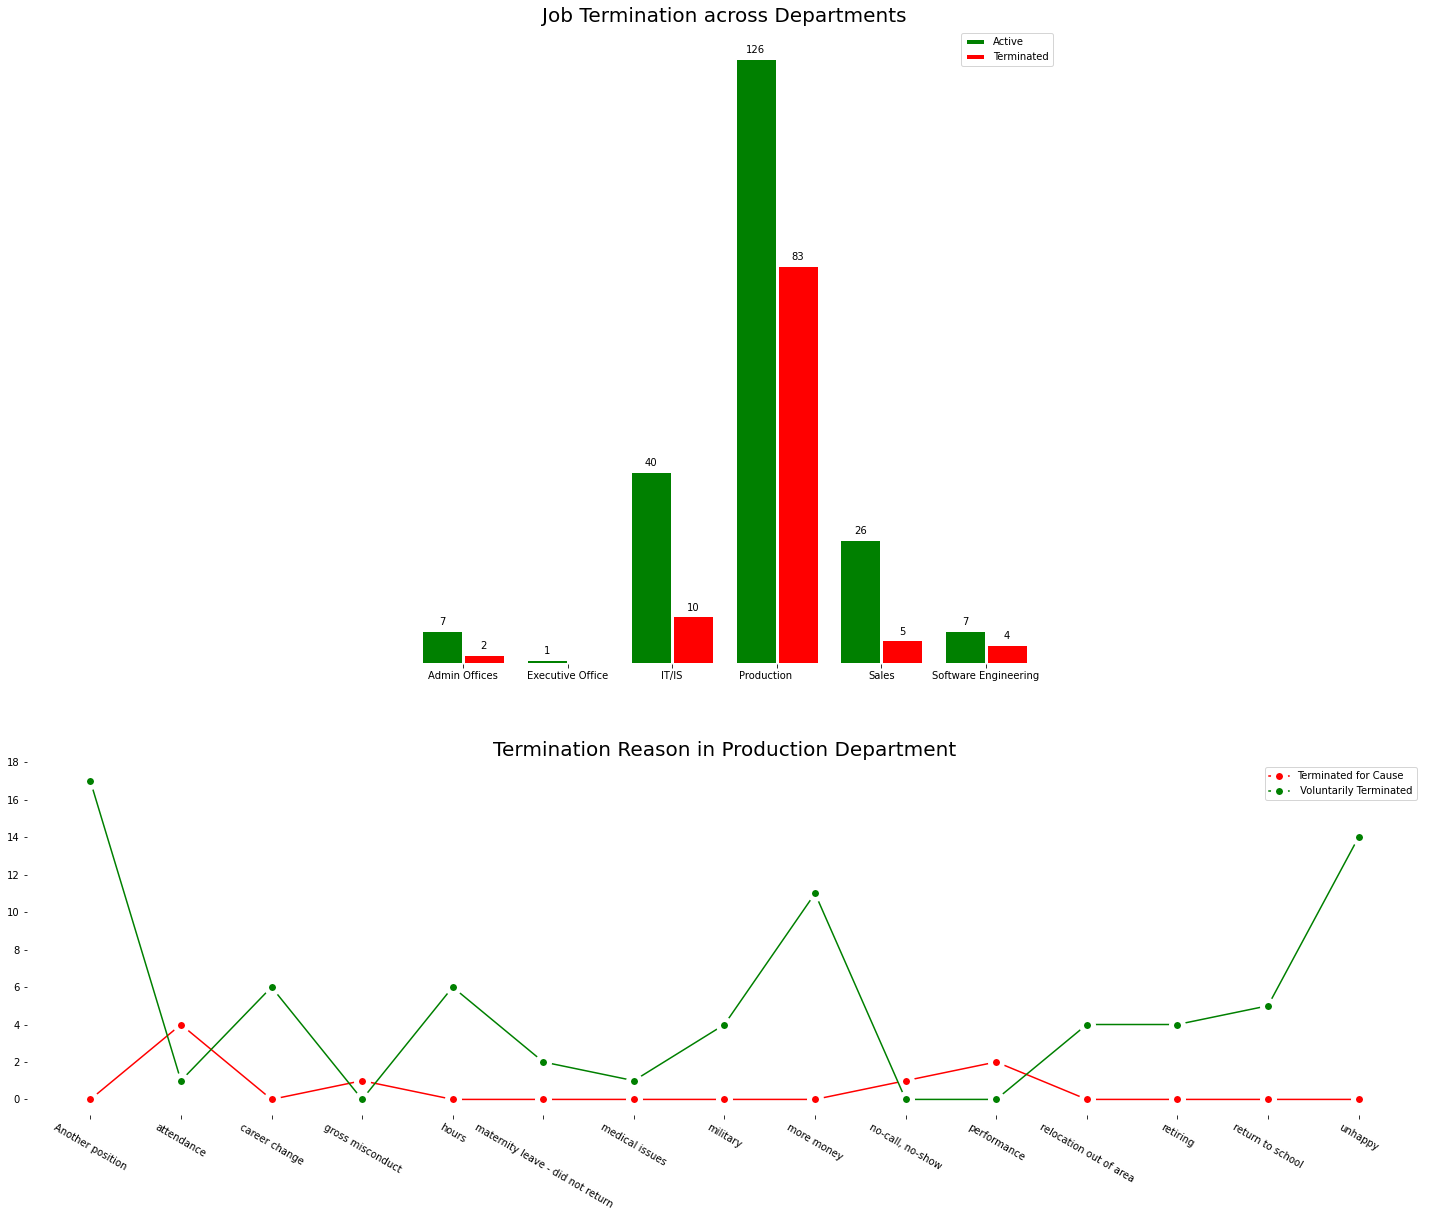

In [14]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25, 20))

gs = gridspec.GridSpec(2, 4,
                       figure=fig,
                       hspace=0.2, wspace=0.2,
                       width_ratios=[0.3, 0.3,0.3,0.3],
                       height_ratios=[1.8, 1]) 


ax0 = fig.add_subplot(gs[0, 1:3]) 
ax1 = fig.add_subplot(gs[1, 0:4]) 
labels1 = df2['Department']
labels2 = dfp5['TermReason']
width = 0.40 
x = np.arange(len(labels1))
x2 = np.arange(len(labels2))
rects1 = ax0.bar(x - width/2, df2['0'], width,color='green',edgecolor='white',linewidth=3 ,label='Active')
rects2 = ax0.bar(x + width/2, df2['1'], width,color='red', edgecolor='white',linewidth=3,label='Terminated')
line1 = ax1.plot(dfp5['TermReason'],dfp5['Terminated for Cause'], marker = 'o',markeredgecolor='white',markeredgewidth = 5, markersize=12, color = 'red', label = 'Terminated for Cause')
line2 = ax1.plot(dfp5['TermReason'],dfp5['Voluntarily Terminated'], marker = 'o',markeredgecolor='white',markeredgewidth = 5, markersize=12, color = 'green', label = ' Voluntarily Terminated')

ax0.set_title('Job Termination across Departments',fontsize = 20)
ax1.set_title('Termination Reason in Production Department',fontsize = 20)



ax0.legend()
ax1.legend()
ax0.set_xticks(x, labels1)
ax1.set_xticks(x2,labels2,rotation = -30)
ax1.set_yticks(np.arange(0,19,2))
ax0.set_frame_on(False)
ax1.set_frame_on(False)

ax0.bar_label(rects1, padding=3)
ax0.bar_label(rects2, padding=3)
ax0.get_yaxis().set_visible(False)
plt.savefig('Fourth.png')
plt.show()